In [26]:
# Imports 

import numpy as np 
import pandas as pd 
import os 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt 


In [27]:
# Import Dataset 

data = pd.read_csv('./Datasets/heart_disease_uci.csv')
data.tail(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
910,911,51,Female,VA Long Beach,asymptomatic,114.0,258.0,True,lv hypertrophy,96.0,False,1.0,upsloping,NaN,NaN,0
911,912,62,Male,VA Long Beach,asymptomatic,160.0,254.0,True,st-t abnormality,108.0,True,3.0,flat,NaN,NaN,4
912,913,53,Male,VA Long Beach,asymptomatic,144.0,300.0,True,st-t abnormality,128.0,True,1.5,flat,NaN,NaN,3
913,914,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,NaN,NaN,NaN,1
914,915,46,Male,VA Long Beach,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,NaN,NaN,normal,2
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [28]:
# encoding the dataset to integers using an encoder

le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] =  le.fit_transform(data[col])

In [29]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 759
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        308 non-null    int64  
 1   age       308 non-null    int64  
 2   sex       308 non-null    int64  
 3   dataset   308 non-null    int64  
 4   cp        308 non-null    int64  
 5   trestbps  308 non-null    float64
 6   chol      308 non-null    float64
 7   fbs       308 non-null    int64  
 8   restecg   308 non-null    int64  
 9   thalch    308 non-null    float64
 10  exang     308 non-null    int64  
 11  oldpeak   308 non-null    float64
 12  slope     308 non-null    int64  
 13  ca        308 non-null    float64
 14  thal      308 non-null    int64  
 15  num       308 non-null    int64  
dtypes: float64(5), int64(11)
memory usage: 40.9 KB


In [30]:
X = data.drop(columns=['num'])
y = data['num']

print(X.shape,y.shape)

(308, 15) (308,)


In [31]:
# splitting the data

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y,stratify=y)

# Regular Tree

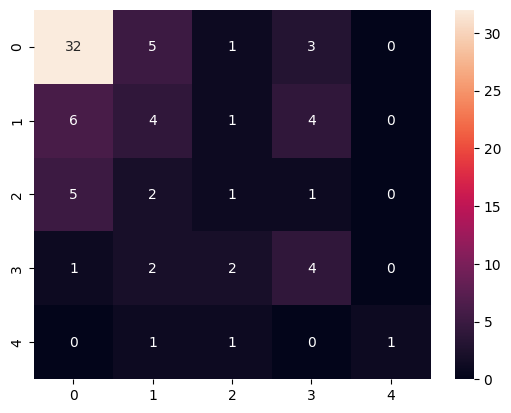

Regular Tree ACC: 0.5454545454545454


In [32]:
clf = tree.DecisionTreeClassifier(random_state = 0)
clf.fit(X_tr,y_tr)

y_pred = clf.predict(X_ts)
cm  = confusion_matrix(y_ts,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

print('Regular Tree ACC:',accuracy_score(y_ts,y_pred))

# Pruned Tree

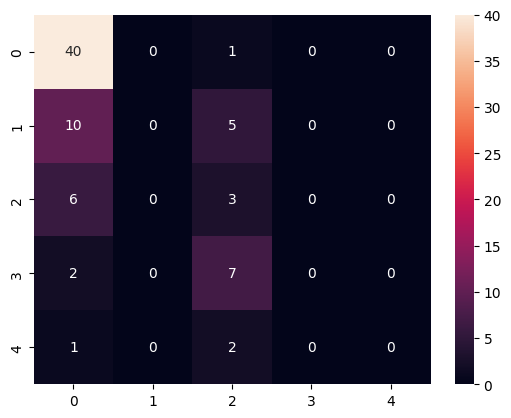

Pruned Tree ACC: 0.5584415584415584


In [33]:
# pruning the tree 

pr_clf = tree.DecisionTreeClassifier(random_state=0, max_depth = 2)
pr_clf.fit(X_tr, y_tr)

y_pred = pr_clf.predict(X_ts)
cm = confusion_matrix(y_ts, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print('Pruned Tree ACC:',accuracy_score(y_ts,y_pred))



# Random Forest

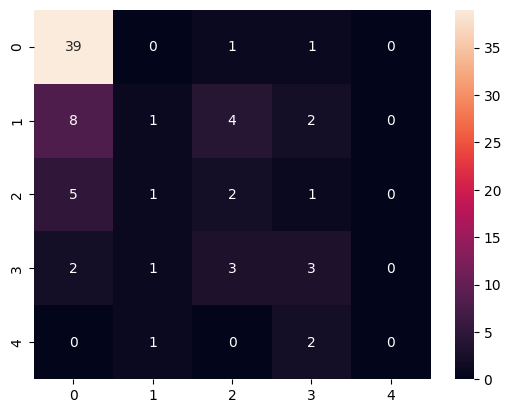

Random Forest ACC: 0.5844155844155844


In [34]:
rf_clf = RandomForestClassifier(random_state=0, n_estimators=50, max_depth=7)

rf_clf.fit(X_tr,y_tr)

y_pred = rf_clf.predict(X_ts)
cm = confusion_matrix(y_ts, y_pred)

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print('Random Forest ACC:',accuracy_score(y_ts,y_pred))
